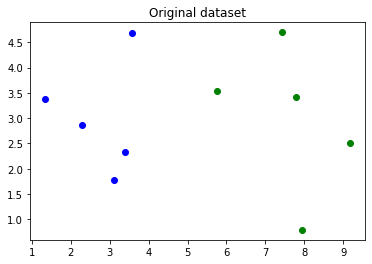

Label for  [1, 1] 	is  0
Label for  [2, 3] 	is  0
Label for  [3, 2] 	is  0
Label for  [4, 5] 	is  0
Label for  [10, 9] 	is  1
Label for  [9, 8] 	is  1
Label for  [5.7, 3.2] 	is  1


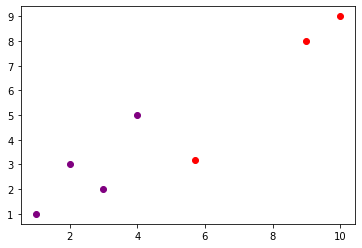

In [2]:
#Naive Bayes
import numpy as np
import matplotlib.pyplot as plt

#Standardization performed
def feature_scaling(on_this_array):
  if(len(on_this_array.shape)==2):
    on_this_array=on_this_array.astype(np.double)
    for i in range(0, len(on_this_array[0])):
        meanValue=np.mean(on_this_array[:,i])
        stdValue=np.std(on_this_array[:,i])
        on_this_array[:,i]=(on_this_array[:,i]-meanValue)/stdValue
  else:
    meanValue=np.mean(on_this_array)
    stdValue=np.std(on_this_array)
    on_this_array[:]=(on_this_array[:]-meanValue)/stdValue
  return on_this_array

def get_mean(some_array):
  return np.mean(some_array, axis=0)

def get_std(some_array):
  return np.std(some_array, axis=0)

def get_Gaussian_PDF(x, mean_value, std_value):
  from math import sqrt
  from math import pi
  from math import exp
  term=exp(-((x-mean_value)**2/(2*std_value**2)))
  return (1/(sqrt(2*pi)*std_value))*term

def predict_proba(groups, x_testing, stats_group, prob_y):
  prob_groups={}
  hold=1
  for key, values in groups.items():
    for i in range(0, len(stats_group[key][0])):
      hold=hold*get_Gaussian_PDF(x_testing[i], stats_group[key][0][i], stats_group[key][1][i])
    prob_groups[key]=prob_y[key]*hold
    prob_y[key]=0.5
    hold=1

  ans_prob=0
  for key, value in prob_groups.items():
    if(ans_prob<value):
      ans_prob=value
      ans_label=key
  return ans_label


dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]

#dataset=np.asarray(dataset)
import matplotlib.pyplot as plt
plt.scatter(np.asarray(dataset)[0:5,0], np.asarray(dataset)[0:5,1], color='blue')
plt.scatter(np.asarray(dataset)[5:,0], np.asarray(dataset)[5:,1], color='green')
plt.title("Original dataset")
plt.show()

groups={}
for i in range(0, len(dataset)):
  if(dataset[i][2] in groups.keys()):
    temp=groups[dataset[i][2]]
    temp.append(dataset[i][0:2])
    groups[dataset[i][2]]=temp
  else:
    temp=[]
    temp.append(dataset[i][0:2])
    groups[dataset[i][2]]=temp

stats_group={}
for key, values in groups.items():
  values=np.asarray(values)
  temp=[]
  temp.append(get_mean(values))
  temp.append(get_std(values))
  stats_group[key]=temp

#P(y=0|x1,x2)=P(x1|y=0)*P(x2|y=0)*P(y=0) basic formula
#Number of y=0/total number of samples
prob_y=[]
prob_y.append(0.5)
prob_y.append(0.5)

x_testing=[
           [1,1],[2,3],[3,2],[4,5],[10,9],[9,8],[5.7,3.2]
]
colors=['purple', 'red']
for i in range(0, len(x_testing)):
  label=predict_proba(groups, x_testing[i], stats_group, prob_y)
  print("Label for ", x_testing[i], "\tis ", label)
  plt.scatter(x_testing[i][0], x_testing[i][1], color=colors[label])

plt.show()







